### Moon Dataset

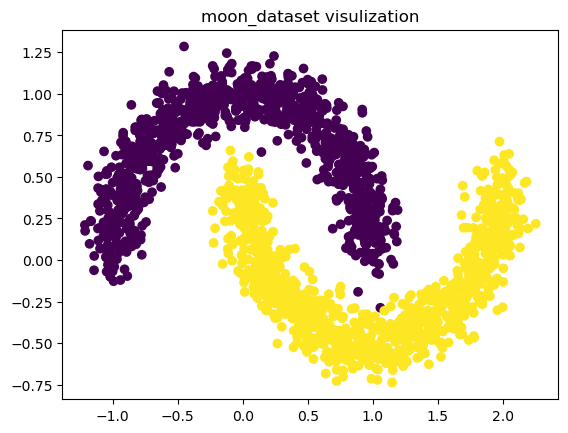

In [1]:
%matplotlib inline
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from node import Node, Graph
import numpy as np

# 生成 make_moons 数据集
X, y = make_moons(n_samples=2000, noise=0.1
                  , random_state=42)
# X是每个点的坐标(x, y)，y是每个点的label
nodes = []
index = 0
for df, label in zip(X, y):
    nodes.append(Node(df, label, index))
    index += 1
# scatter
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("moon_dataset visulization")
plt.show()

### 构建邻接矩阵

In [2]:
DISTANCE = 0.5
graph = Graph(nodes, distance=DISTANCE)
adjacency_matrix = np.array(graph.get_adjacency_matrix())
print("邻接矩阵：", adjacency_matrix.shape)

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()
print(f"Distance={DISTANCE}, 构建了{len(edges)}条边")

邻接矩阵： (2000, 2000)
Distance=0.5, 构建了289371条边


### DeepWalk

#### Deepwalk策略定义

In [3]:
# deepwalk的游走策略
import networkx as nx
import gensim
import random

def deepwalk(graph, walk_length = 60, num_walks = 200, dim = 32):
    # 生成随机游走序列
    walks = []
    for _ in range(num_walks):
        node = random.choice(list(graph.nodes))
        walk = [node]
        while len(walk) < walk_length:
            neighbors = list(graph[node])
            next_node = neighbors[random.randint(0, len(neighbors) - 1)] if neighbors else node
            walk.append(next_node)
            node = next_node
        walks.append(walk)
    # print(walks, end = '\n')

    # 使用 gensim 的 Word2Vec 训练嵌入向量
    sentences = [list(map(str, walk)) for walk in walks]
    # for walk in walks:
    #     print(walk)
    # print(sentences)
    model = gensim.models.Word2Vec(sentences, vector_size=dim, window=walk_length, min_count=1, sg=1)
    node2vec = {str(node): model.wv[str(node)] if str(node) in model.wv else None for node in graph.nodes}
    # for node in graph.nodes:
        # print(node, model.wv[str(node)])
    return node2vec

#### Deepwalk嵌入，取两维简单做个可视化

In [4]:
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx)
label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

#### PCA降维，降到两维后做可视化

/home/sweet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


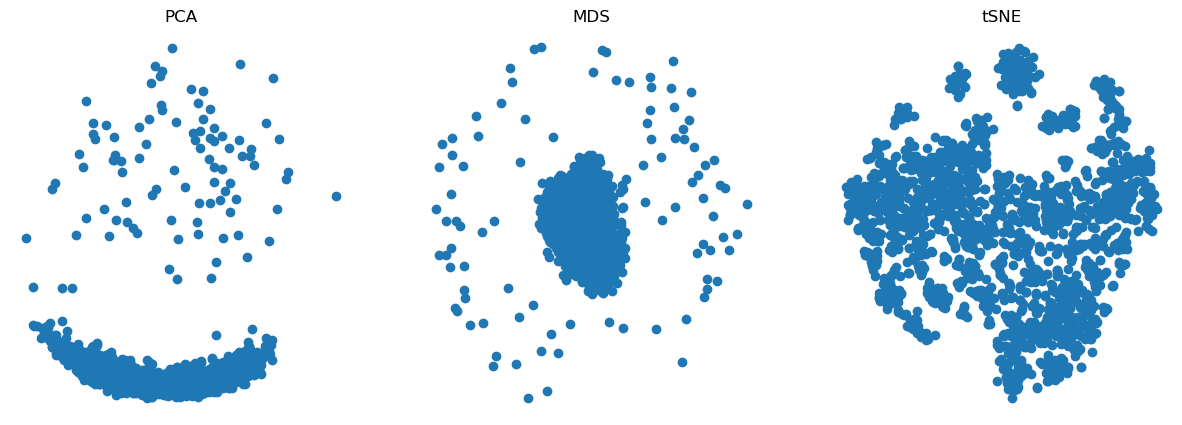

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

# 先drop掉None
embeddings = {key: value for key, value in embeddings.items() if value is not None}
# 假设embeddings是一个字典，其中包含嵌入值
embeddings_value = np.array(list(embeddings.values()))
label = None  # 请替换成你的标签数据

# 使用PCA进行降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings_value)

# 使用MDS进行降维
mds = MDS(n_components=2)
X_mds = mds.fit_transform(embeddings_value)

# 使用tSNE进行降维
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(embeddings_value)

# 设置子图
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label)
plt.title('PCA')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=label)
plt.title('MDS')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=label)
plt.title('tSNE')
plt.axis('off')

plt.show()
